In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import os

In [24]:
DAY_NIGHT_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_and_night_weather.csv"
DAY_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_only_weather.csv"

day_night_solar_df = pd.read_csv(DAY_NIGHT_DATASET_PATH, sep=",", index_col=0)
day_night_solar_df = day_night_solar_df.iloc[:, :10]
print(day_night_solar_df.head())

X_day_night = day_night_solar_df.iloc[:, :-1].values
y_day_night = day_night_solar_df.iloc[:, -1].values

day_solar_df = pd.read_csv(DAY_DATASET_PATH, sep=",", index_col=1)
day_solar_df = day_solar_df.iloc[:, :10]
day_solar_df = day_solar_df.iloc[:, 1:]
print(day_solar_df.head())

X_day = day_solar_df.iloc[:, :-1].values
y_day = day_solar_df.iloc[:, -1].values

         Hour  Cloud coverage  Visibility  Temperature  Dew point   
Date                                                                
1/31/16    24             0.0        5.00         1.40       0.89  \
2/1/16      1             0.0        7.88         1.16       0.62   
2/1/16      2             0.0        9.84         1.22       0.96   
2/1/16      3             0.0        9.84         1.02       0.61   
2/1/16      4             0.0        9.88         0.83       0.45   

         Relative humidity  Wind speed  Station pressure  Altimeter   
Date                                                                  
1/31/16              95.56        9.00             29.10      29.89  \
2/1/16               91.04        7.04             29.11      29.90   
2/1/16               89.28        8.96             29.12      29.91   
2/1/16               89.12        6.36             29.14      29.93   
2/1/16               90.08        6.12             29.15      29.94   

         Solar ene

In [28]:
kf = KFold(n_splits=5, shuffle=True)

print("Day and Night Dataset")

best_mse = float('inf')

for fold, (train_index, val_index) in enumerate(kf.split(X_day_night, y_day_night)):
    print(f"Training on fold {fold + 1}...")

    X_train_fold, X_val_fold = X_day_night[train_index], X_day_night[val_index]
    y_train_fold, y_val_fold = y_day_night[train_index], y_day_night[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    mlp_model.fit(X_train_fold, y_train_fold)

    val_predicted = mlp_model.predict(X_val_fold)

    fold_mse = np.mean((val_predicted - y_val_fold) ** 2)
    print(f"Fold {fold + 1} MSE: {fold_mse}")

    if fold_mse < best_mse:
        best_mse = fold_mse

print("Overall Best MSE:", best_mse)

print("Day Only Dataset")

best_mse = float('inf')

for fold, (train_index, val_index) in enumerate(kf.split(X_day, y_day)):
    print(f"Training on fold {fold + 1}...")

    X_train_fold, X_val_fold = X_day[train_index], X_day[val_index]
    y_train_fold, y_val_fold = y_day[train_index], y_day[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    mlp_model.fit(X_train_fold, y_train_fold)

    val_predicted = mlp_model.predict(X_val_fold)

    fold_mse = np.mean((val_predicted - y_val_fold) ** 2)
    print(f"Fold {fold + 1} MSE: {fold_mse}")

    if fold_mse < best_mse:
        best_mse = fold_mse

print("Overall Best MSE:", best_mse)

Day and Night Dataset
Training on fold 1...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1 MSE: 333010.6067565939
Training on fold 2...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 MSE: 312233.2667794276
Training on fold 3...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3 MSE: 322899.15367208107
Training on fold 4...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4 MSE: 301047.01464027667
Training on fold 5...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 5 MSE: 295281.96141197276
Overall Best MSE: 295281.96141197276
Day Only Dataset
Training on fold 1...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1 MSE: 0.18206345401576646
Training on fold 2...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 MSE: 0.12634068178467697
Training on fold 3...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3 MSE: 0.33941740673635873
Training on fold 4...


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4 MSE: 0.17114692760313835
Training on fold 5...
Fold 5 MSE: 0.12406327276394212
Overall Best MSE: 0.12406327276394212


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
def moving_average(data, n=100):
    cumsum = np.cumsum(data, dtype=float)
    cumsum[n:] = cumsum[n:] - cumsum[:-n]
    return cumsum[n - 1:] / n

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


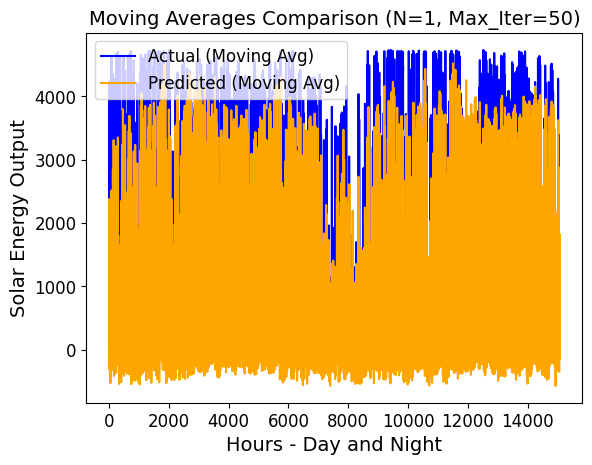

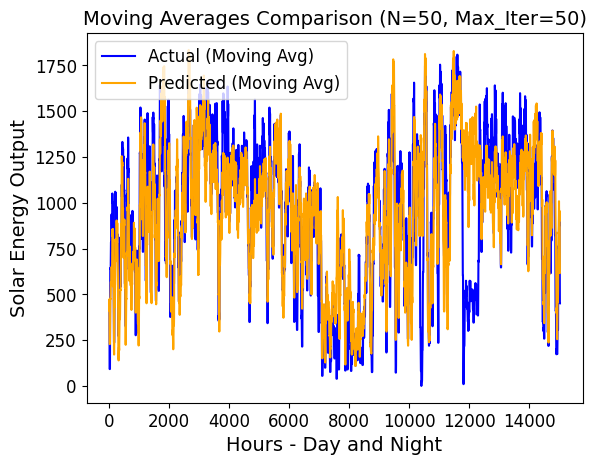

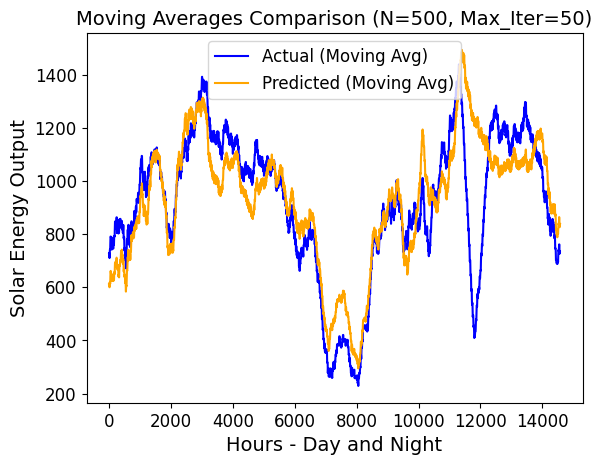

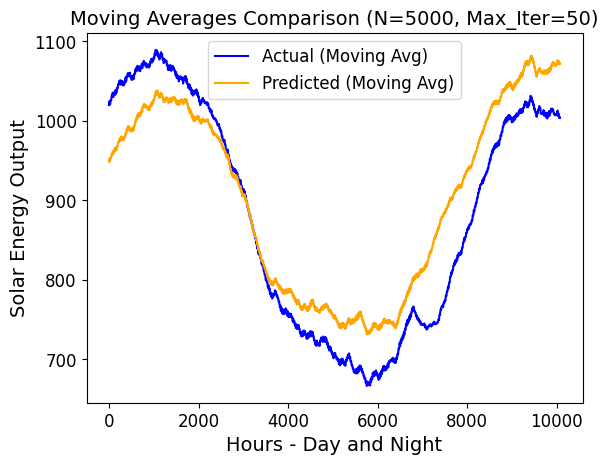

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


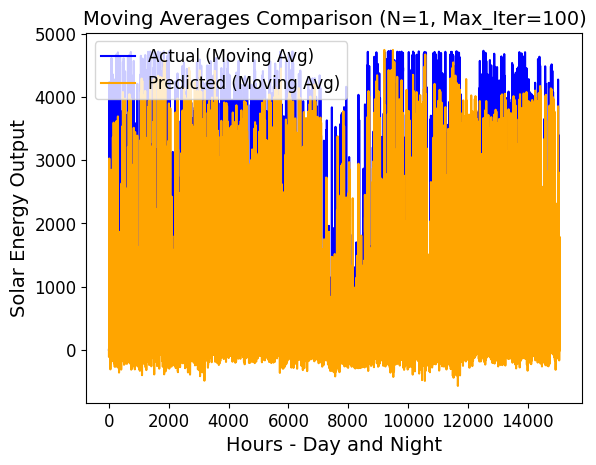

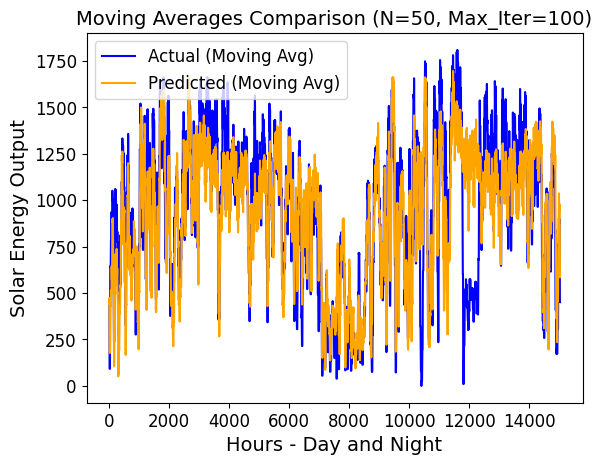

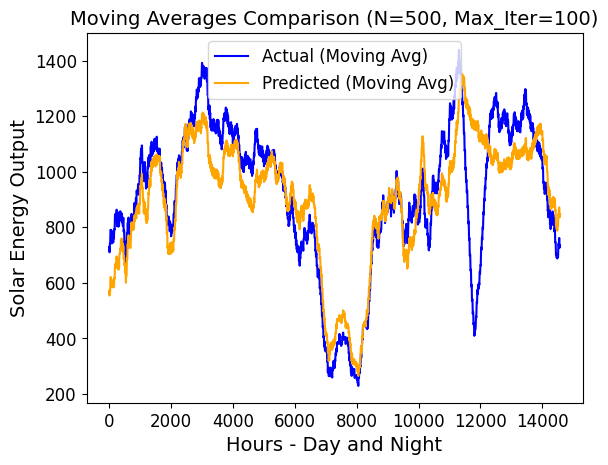

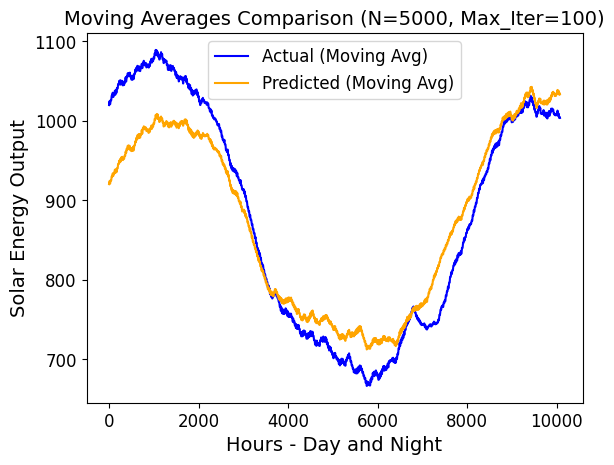

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


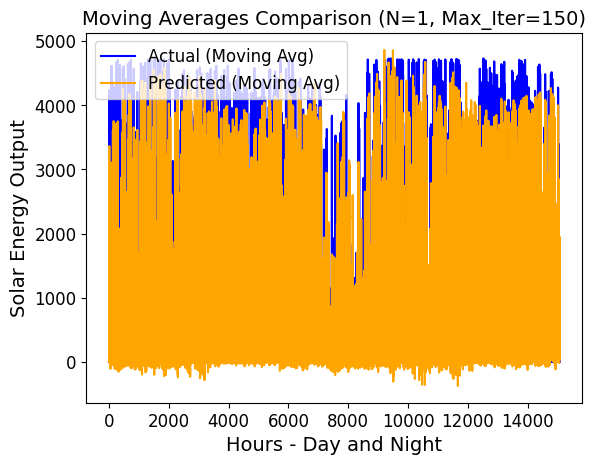

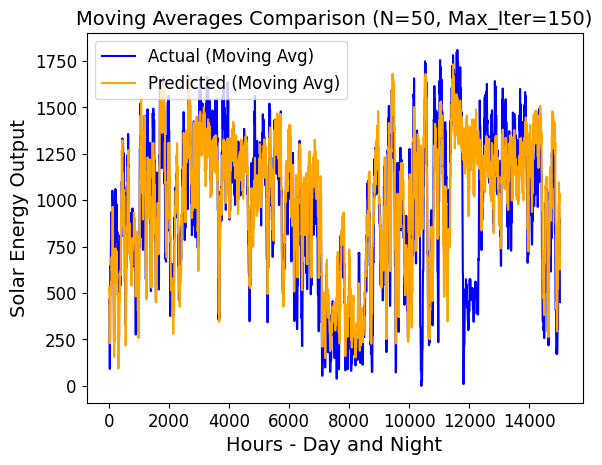

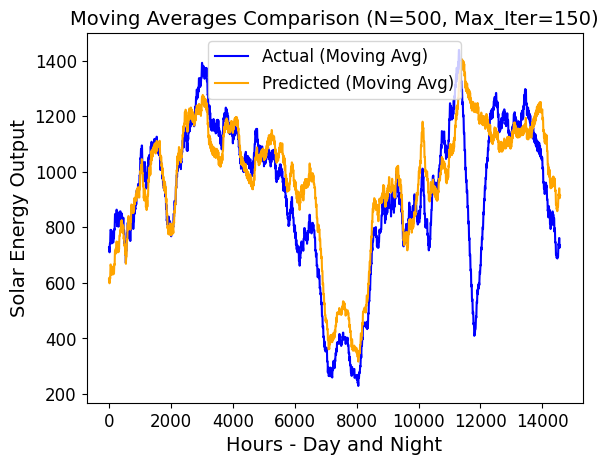

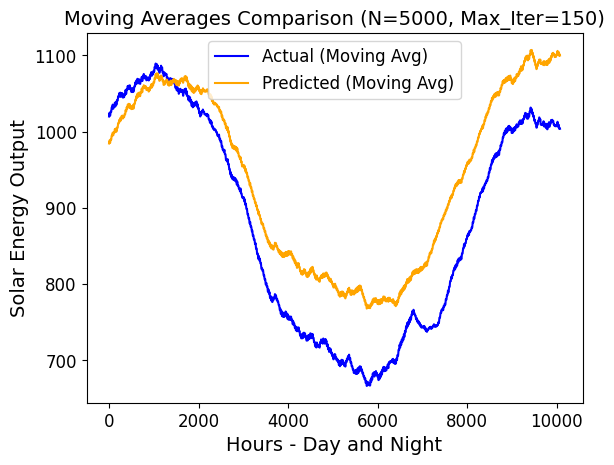

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


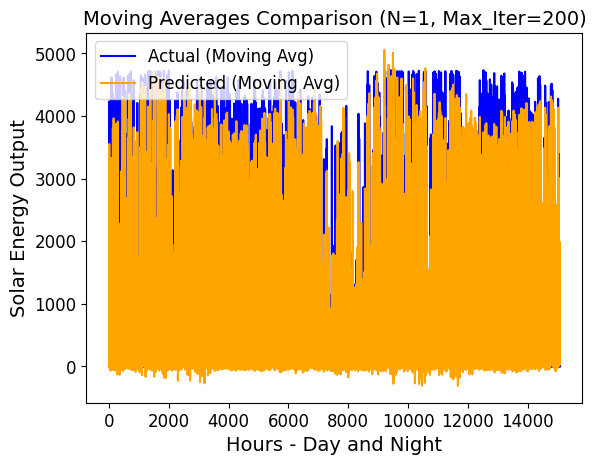

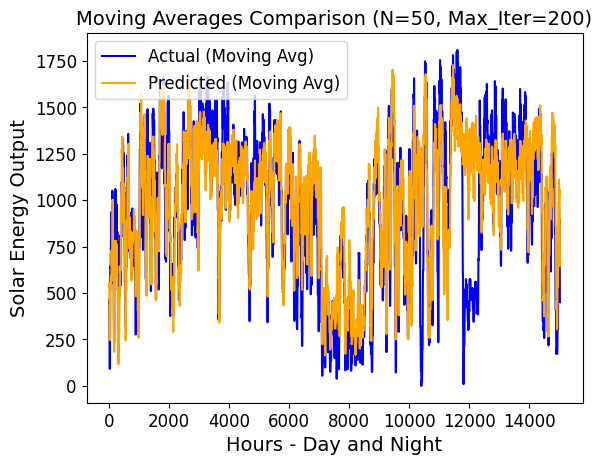

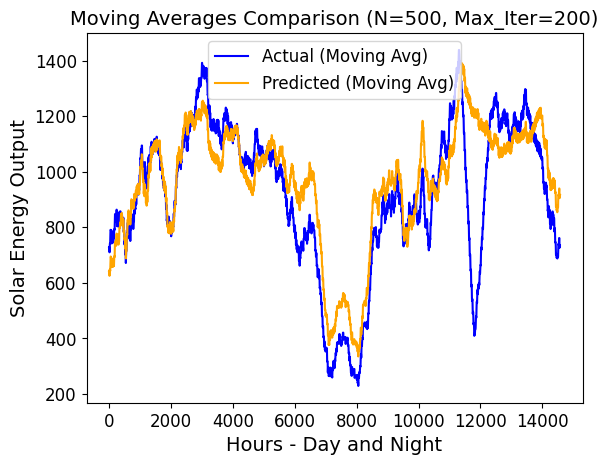

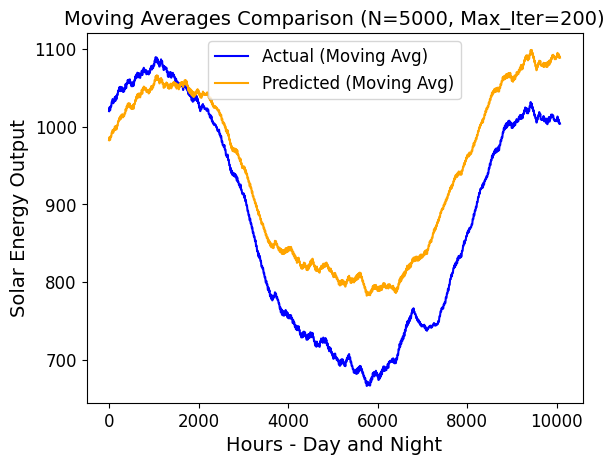

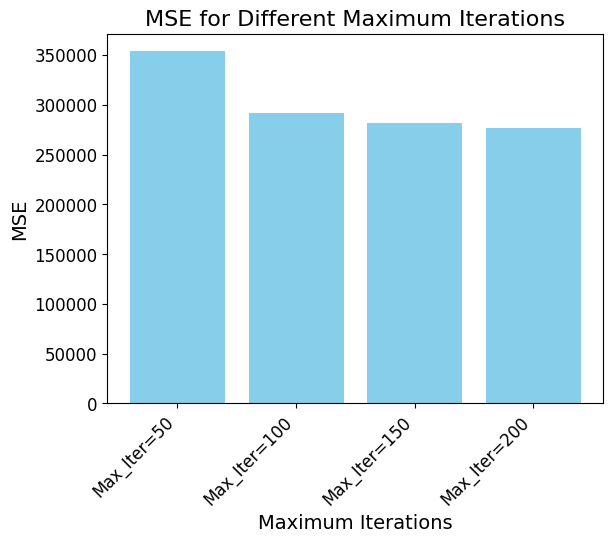

In [26]:
save_dir = 'neural_network_plots'
os.makedirs(save_dir, exist_ok=True)

best_mse = float('inf')
best_params = None

mse_values = []
max_iter_lst = [50, 100, 150, 200]

for max_iter in max_iter_lst:

    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X_day_night, y_day_night)
    final_model_predicted = final_model.predict(X_day_night)
    mse = mean_squared_error(y_day_night, final_model_predicted)
    mse_values.append(mse)

    if mse < best_mse:
            best_mse = mse
            best_iter = {'max_iter': max_iter} 
    
    for n in [1, 50, 500, 5000]:

        y_avg = moving_average(y_day_night, n)
        predicted_avg = moving_average(final_model_predicted, n)

        plt.plot(y_avg, label='Actual (Moving Avg)', color='blue')
        plt.plot(predicted_avg, label='Predicted (Moving Avg)', color='orange')

        plt.title(f'Moving Averages Comparison (N={n}, Max_Iter={max_iter})', fontsize=14)
        plt.xlabel('Hours - Day and Night', fontsize=14)
        plt.ylabel('Solar Energy Output', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend(fontsize=12)

        plt.savefig(os.path.join(save_dir, f'day_night_{n}_{max_iter}.png'))
        plt.show()

plt.bar(range(len(mse_values)), mse_values, color='skyblue')
plt.xticks(range(len(mse_values)), [f'Max_Iter={max_iter}' for max_iter in max_iter_lst], rotation=45, ha='right')
plt.title('MSE for Different Maximum Iterations', fontsize=16)
plt.xlabel('Maximum Iterations', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(os.path.join(save_dir, 'day_night_mse_bar_plot.png'))
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


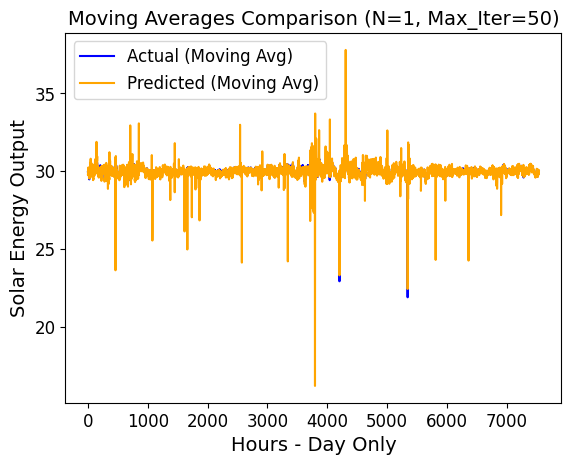

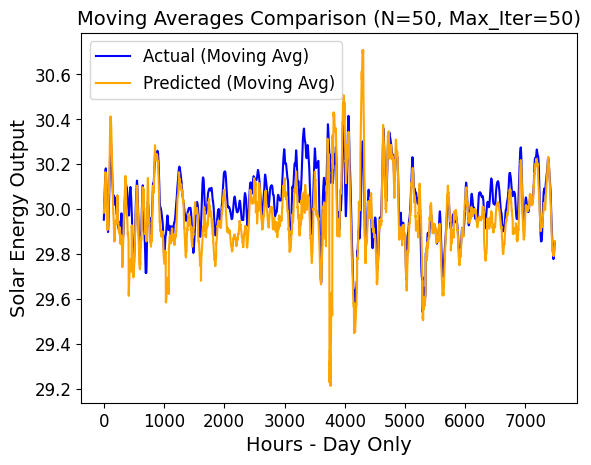

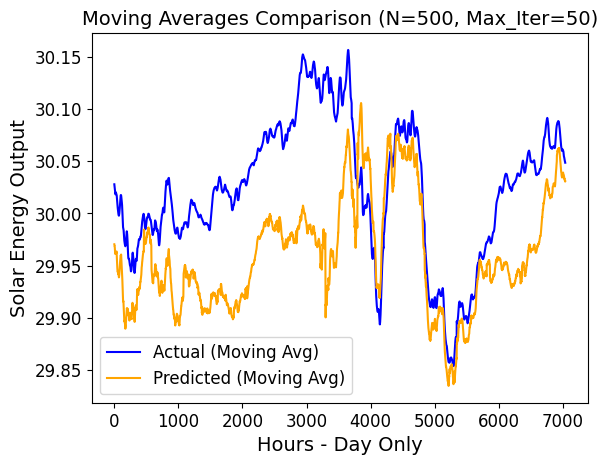

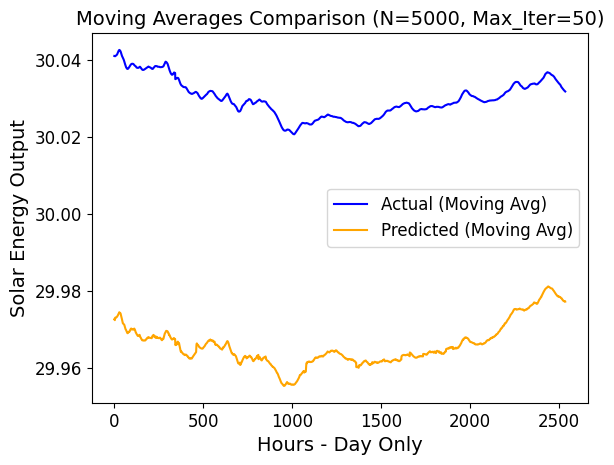

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


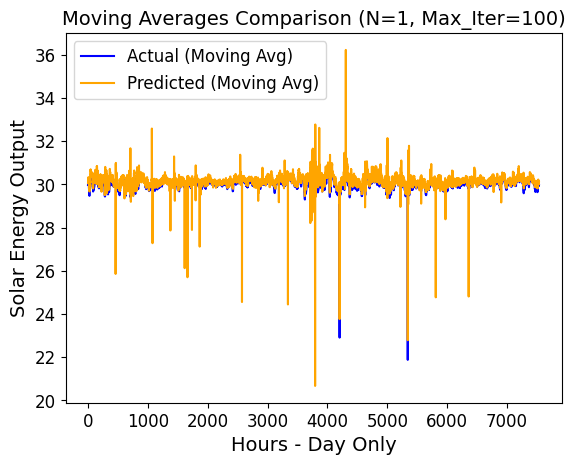

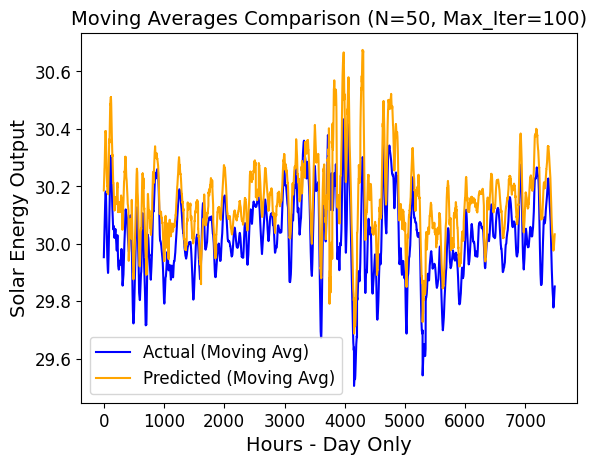

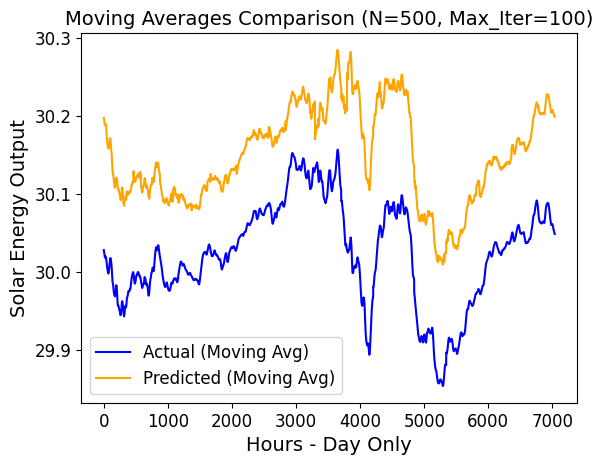

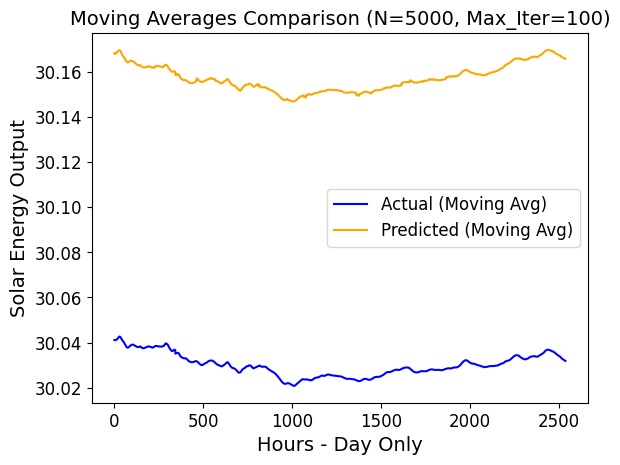

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


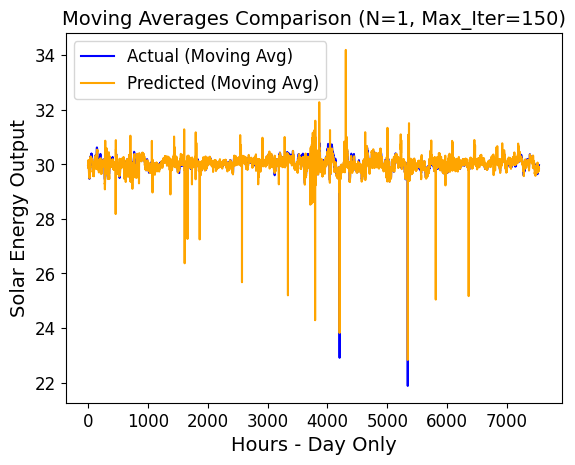

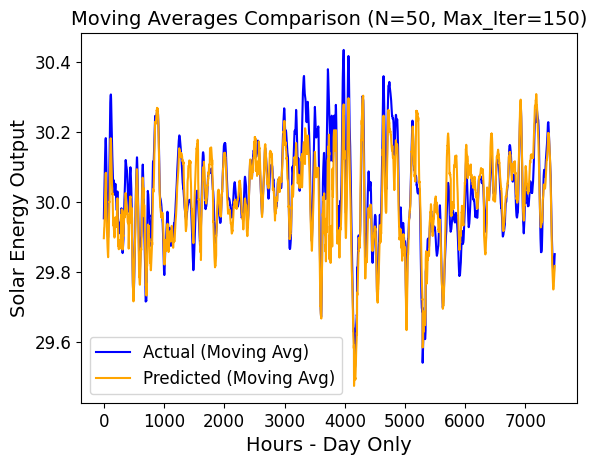

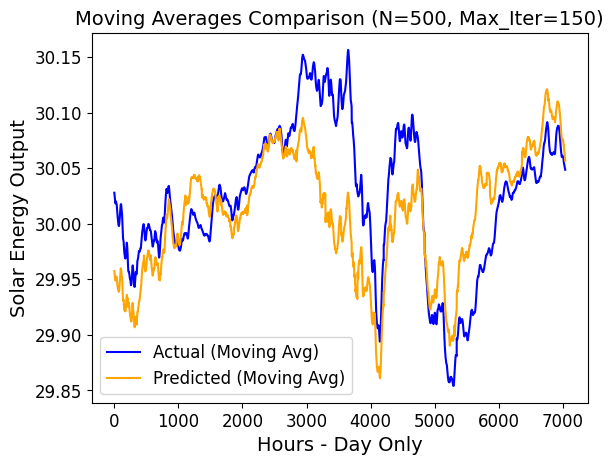

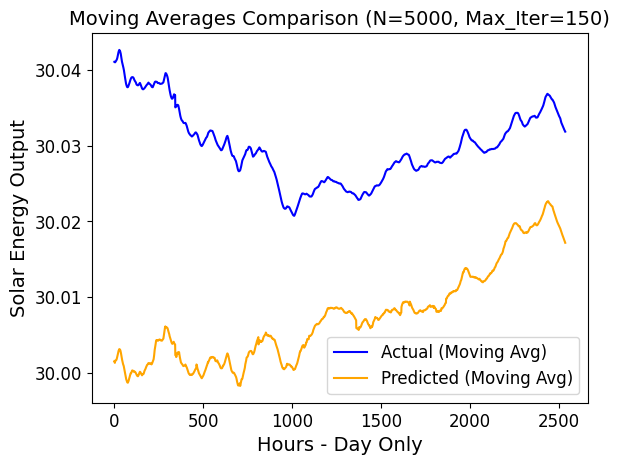

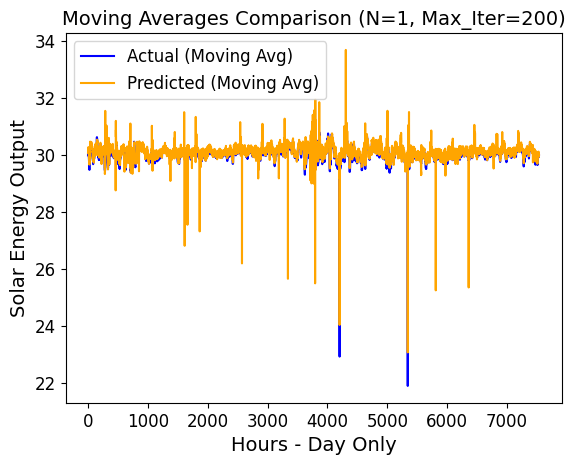

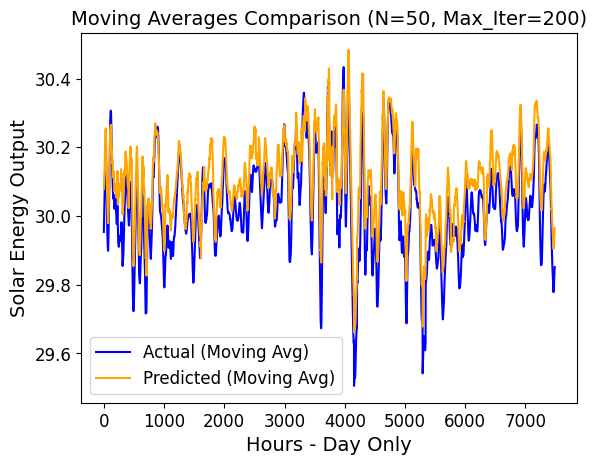

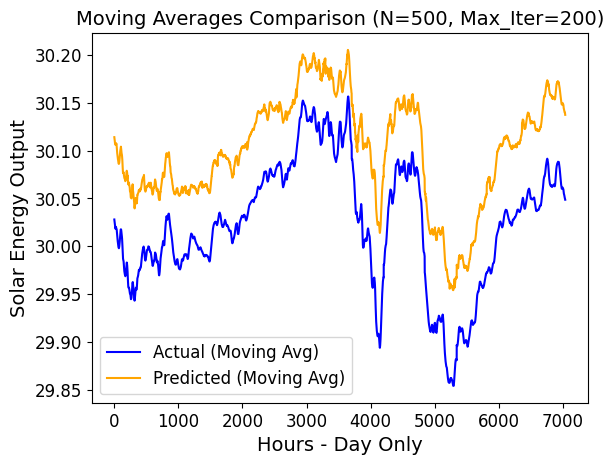

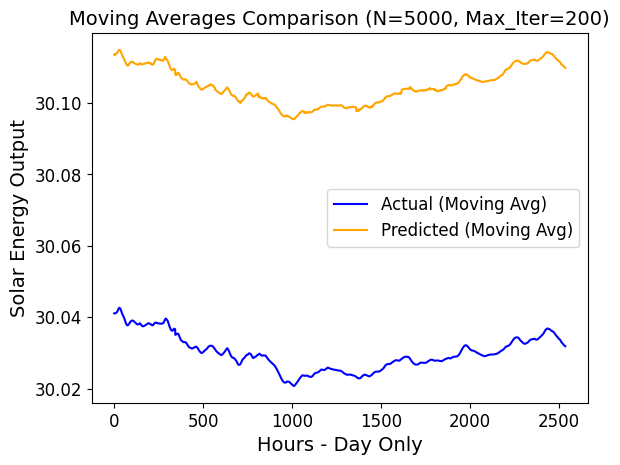

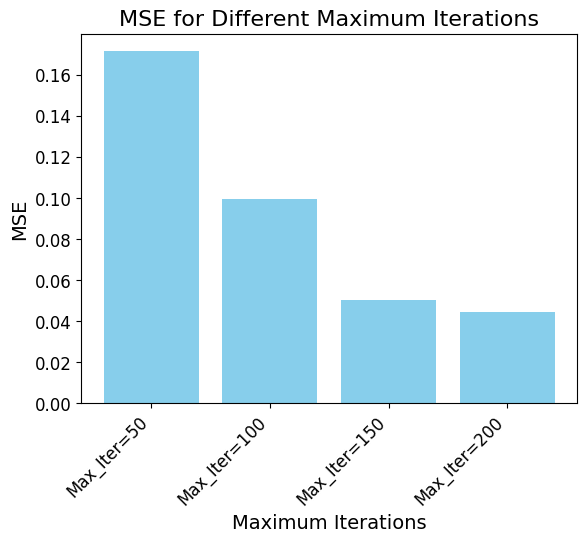

In [27]:
save_dir = 'neural_network_plots'
os.makedirs(save_dir, exist_ok=True)

best_mse = float('inf')
best_params = None

mse_values = []
max_iter_lst = [50, 100, 150, 200]

for max_iter in max_iter_lst:

    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X_day, y_day)
    final_model_predicted = final_model.predict(X_day)
    mse = mean_squared_error(y_day, final_model_predicted)
    mse_values.append(mse)

    if mse < best_mse:
            best_mse = mse
            best_iter = {'max_iter': max_iter} 
    
    for n in [1, 50, 500, 5000]:

        y_avg = moving_average(y_day, n)
        predicted_avg = moving_average(final_model_predicted, n)

        plt.plot(y_avg, label='Actual (Moving Avg)', color='blue')
        plt.plot(predicted_avg, label='Predicted (Moving Avg)', color='orange')

        plt.title(f'Moving Averages Comparison (N={n}, Max_Iter={max_iter})', fontsize=14)
        plt.xlabel('Hours - Day Only', fontsize=14)
        plt.ylabel('Solar Energy Output', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend(fontsize=12)

        plt.savefig(os.path.join(save_dir, f'day_only_{n}_{max_iter}.png'))
        plt.show()

plt.bar(range(len(mse_values)), mse_values, color='skyblue')
plt.xticks(range(len(mse_values)), [f'Max_Iter={max_iter}' for max_iter in max_iter_lst], rotation=45, ha='right')
plt.title('MSE for Different Maximum Iterations', fontsize=16)
plt.xlabel('Maximum Iterations', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig(os.path.join(save_dir, 'day_mse_bar_plot.png'))
plt.show()